In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Take in and store the files
trainfile = open("UNSW_NB15_training-set.csv","r")
traindata = pd.read_csv(trainfile, index_col=0)

trainfile.close()

testfile = open("UNSW_NB15_testing-set.csv","r")
testdata = pd.read_csv(testfile, index_col=0)

testfile.close()

In [3]:
# Use Panda's factorize functionality on text fields so that they don't have to be dropped.

# Have to concat the data together so that things that only appear in test or train are still accounted for.
codesProto, uniquesProto = pd.factorize(pd.concat([traindata['proto'], testdata['proto']]))

traindata['proto'] = codesProto[:len(traindata)]+1
testdata['proto'] = codesProto[len(traindata):]+1

codesService, uniquesService = pd.factorize(pd.concat([traindata['service'], testdata['service']]))

traindata['service'] = codesService[:len(traindata)]+1
testdata['service'] = codesService[len(traindata):]+1


codesState, uniquesState = pd.factorize(pd.concat([traindata['state'], testdata['state']]))

traindata['state'] = codesState[:len(traindata)]+1
testdata['state'] = codesState[len(traindata):]+1


In [4]:
#Prep data for models
    # Store observations from train set, ignoring proto, service, state, attack_cat, and label fields
    # With label included, forest hits 100% (big shocker).
X = traindata.drop(['attack_cat','label'],axis = 1)
X = X.loc[:,:].values

Y = traindata.loc[:,'label'].values # Pull out malicious or not value

    # Store observations from test set, ignoring proto, service, state, attack_cat, and label fields
X_test = testdata.drop(['attack_cat','label'],axis = 1)
X_test = X_test.loc[:,:].values
    
Y_test = testdata.loc[:,'label'].values # Pull out malicious or not value

In [5]:
#Create model and fit it to training data
#10 estimators seems to perform well
model = RandomForestClassifier(n_estimators=10)
model.fit(X,Y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
#Generate predicted values
y_pred = model.predict(X_test)
y_pred_train = model.predict(X)
    

In [7]:
#Display accuracy for models
    # See where y_pred doesn't match Y_test, divide by number of observations, 1 - that to get accuracy instead of error rate
print("Test set accuracy = {}" .format(1-((Y_test != y_pred).sum()/len(y_pred))))

    # Can also just see where they're equal to get the accuracy directly
print("Train set accuracy = {}" .format((Y == y_pred_train).sum()/len(Y)))


Test set accuracy = 0.8777389107515912
Train set accuracy = 0.9962130933438271


[[28192  8808]
 [ 1258 44074]]


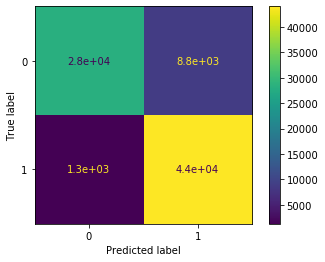

In [8]:
#Display confusion matrix for test set
confusionMatrix = plot_confusion_matrix(model, X_test, Y_test)

print(confusionMatrix.confusion_matrix)
plt.show()

[[ 55660    340]
 [   324 119017]]


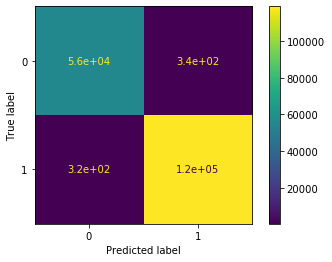

In [9]:
#Display confusion matrix for train set
confusionMatrix = plot_confusion_matrix(model, X, Y)

print(confusionMatrix.confusion_matrix)
plt.show()

In [10]:
#Manual confusion matrix for test set
TP=0
FP=0
TN=0
FN=0

for obs in range(len(Y_test)):
    if Y_test[obs] == 0:
        if y_pred[obs] == Y_test[obs]:
            TN+=1
        else:
            FP+=1
    else:
        if y_pred[obs] == Y_test[obs]:
            TP+=1
        else:
            FN+=1
print("Test set manual confusion matrix")
print("1 Predicted, 0 Predicted")
print("{0} {1}".format(TP, FN))
print("{0} {1}".format(FP, TN))

Test set manual confusion matrix
1 Predicted, 0 Predicted
44074 1258
8808 28192


In [11]:
# Write to files for test set
print("Saving confusion matrix to 'testConfusionMatrix.txt'")

with open("testConfusionMatrix.txt","w") as f:
    f.write("1 predicted, 0 predicted\n")
    f.write("{0} {1}\n".format(TP, FN))
    f.write("{0} {1}".format(FP, TN))

print("Saving vector of predicted values to 'testPredictionVector.csv'")

with open("testPredictionVector.csv","w") as f:
    for item in range(len(y_pred)-1):
        f.write("{}," .format(y_pred[item]))
    f.write("{}" .format(y_pred[len(y_pred)-1]))

print("Saving accuracy to 'testAccuracy.txt'")
with open("testAccuracy.txt","w") as f:
    f.write("Test set accuracy = {}" .format(1-((Y_test != y_pred).sum()/len(y_pred))))


Saving confusion matrix to 'testConfusionMatrix.txt'
Saving vector of predicted values to 'testPredictionVector.csv'
Saving accuracy to 'testAccuracy.txt'


In [12]:
#Manual confusion matrix for train set
print("Train set manual confusion matrix")
TP=0
FP=0
TN=0
FN=0

for obs in range(len(Y)):
    if Y[obs] == 0:
        if y_pred_train[obs] == Y[obs]:
            TN+=1
        else:
            FP+=1
    else:
        if y_pred_train[obs] == Y[obs]:
            TP+=1
        else:
            FN+=1
print("1 Predicted, 0 Predicted")
print("{0} {1}".format(TP, FN))
print("{0} {1}".format(FP, TN))

Train set manual confusion matrix
1 Predicted, 0 Predicted
119017 324
340 55660


In [13]:
# Write to files for train set
print("Saving confusion matrix to 'trainConfusionMatrix.txt'")

with open("trainConfusionMatrix.txt","w") as f:
    f.write("1 predicted, 0 predicted\n")
    f.write("{0} {1}\n".format(TP, FN))
    f.write("{0} {1}".format(FP, TN))

print("Saving vector of predicted values to 'trainPredictionVector.csv'")

with open("trainPredictionVector.csv","w") as f:
    for item in range(len(y_pred)-1):
        f.write("{}," .format(y_pred[item]))
    f.write("{}" .format(y_pred[len(y_pred)-1]))

print("Saving accuracy to 'trainAccuracy.txt'")
with open("trainAccuracy.txt","w") as f:
    f.write("Train set accuracy = {}" .format((Y == y_pred_train).sum()/len(Y)))



Saving confusion matrix to 'trainConfusionMatrix.txt'
Saving vector of predicted values to 'trainPredictionVector.csv'
Saving accuracy to 'trainAccuracy.txt'
